# nvImageCodec transcode examples

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from nvidia import nvimgcodec

Setting resource folder and creation of nvImageCodec decoder and encoder

In [2]:
resources_dir = os.getenv("PYNVIMGCODEC_EXAMPLES_RESOURCES_DIR", "../assets/images/")

decoder = nvimgcodec.Decoder()
encoder = nvimgcodec.Encoder()

### Lossless uint8

codec: png   ; data type: uint8; encoded size=610KB; is image equal after transcoding: True
codec: bmp   ; data type: uint8; encoded size=912KB; is image equal after transcoding: True
codec: jpeg2k; data type: uint8; encoded size=507KB; is image equal after transcoding: True
codec: pnm   ; data type: uint8; encoded size=912KB; is image equal after transcoding: True
codec: tiff  ; data type: uint8; encoded size=682KB; is image equal after transcoding: True
codec: webp  ; data type: uint8; encoded size=388KB; is image equal after transcoding: True


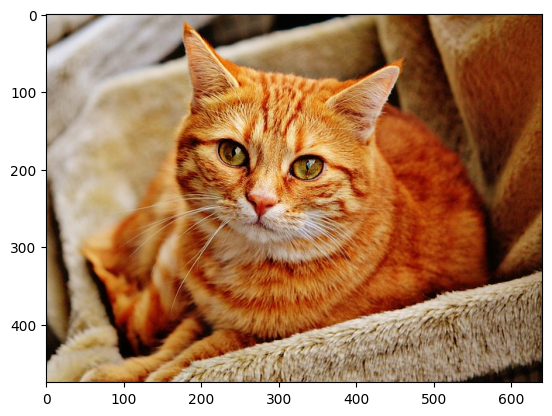

In [3]:
example_image = np.asarray(decoder.read(resources_dir + "cat-1046544_640.jp2").cpu())
plt.imshow(example_image)

for codec in ["png", "bmp", "jpeg2k", "pnm", "tiff", "webp"]:
    encode_params = nvimgcodec.EncodeParams(quality_type=nvimgcodec.QualityType.LOSSLESS)

    encoded = encoder.encode(example_image, codec, encode_params)
    decoded = np.asarray(decoder.decode(encoded).cpu())

    print(f"codec: {codec:6}; data type: {decoded.dtype}; encoded size={len(encoded) // 1000}KB; is image equal after transcoding:", (decoded == example_image).all())

### Lossless uint16

In [4]:
example_image = np.asarray(decoder.read(resources_dir + "cat-1046544_640.jp2").cpu())
example_image = example_image.astype(np.uint16) * 255 # Convert to uint16

for codec in ["png", "jpeg2k", "pnm", "tiff"]:
    encode_params = nvimgcodec.EncodeParams(quality_type=nvimgcodec.QualityType.LOSSLESS)
    encoded = encoder.encode(example_image, codec, encode_params)

    # DecodeParams are required to decode into uint16 instead of uint8
    decode_params = nvimgcodec.DecodeParams(allow_any_depth=True)
    decoded = np.asarray(decoder.decode(encoded, decode_params).cpu())

    print(f"codec: {codec:6}; data type: {decoded.dtype}; encoded size={len(encoded) // 1000:4}KB; is image equal after transcoding:", (decoded == example_image).all())

codec: png   ; data type: uint16; encoded size=1222KB; is image equal after transcoding: True
codec: jpeg2k; data type: uint16; encoded size=1395KB; is image equal after transcoding: True
codec: pnm   ; data type: uint16; encoded size=1824KB; is image equal after transcoding: True
codec: tiff  ; data type: uint16; encoded size= 916KB; is image equal after transcoding: True


### Lossless int16

In [5]:
example_image = np.asarray(decoder.read(resources_dir + "cat-1046544_640.jp2").cpu())
example_image = (example_image.astype(np.int16) - 128) * 255 # Convert to int16

for codec in ["jpeg2k"]:
    encode_params = nvimgcodec.EncodeParams(quality_type=nvimgcodec.QualityType.LOSSLESS)
    encoded = encoder.encode(example_image, codec, encode_params)

    # DecodeParams are required to decode into int16 instead of uint8
    decode_params = nvimgcodec.DecodeParams(allow_any_depth=True)
    decoded = np.asarray(decoder.decode(encoded, decode_params).cpu())

    print(f"codec: {codec:6}; data type: {decoded.dtype}; encoded size={len(encoded) // 1000}KB; is image equal after transcoding:", (decoded == example_image).all(),)

codec: jpeg2k; data type: int16; encoded size=1395KB; is image equal after transcoding: True


### Lossy uint8
Quality values used are low, so that the difference between original and transcoded images is easy to spot.


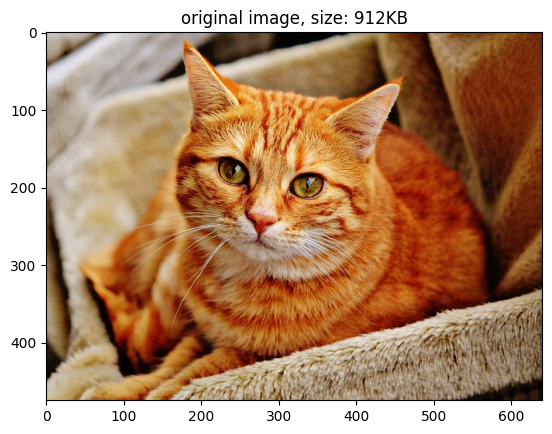

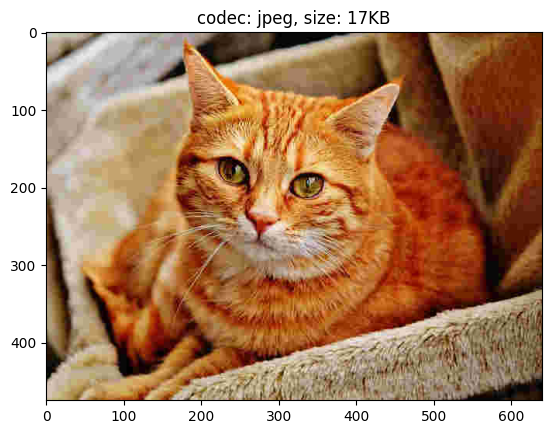

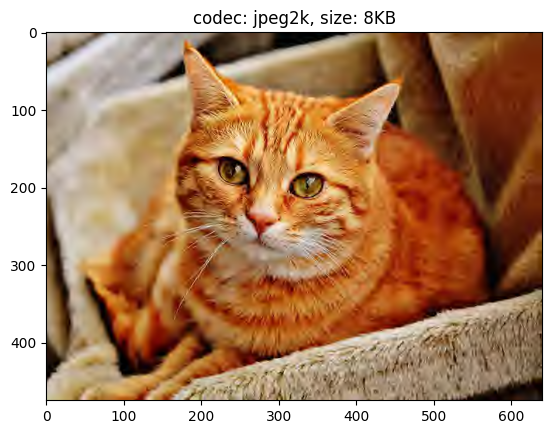

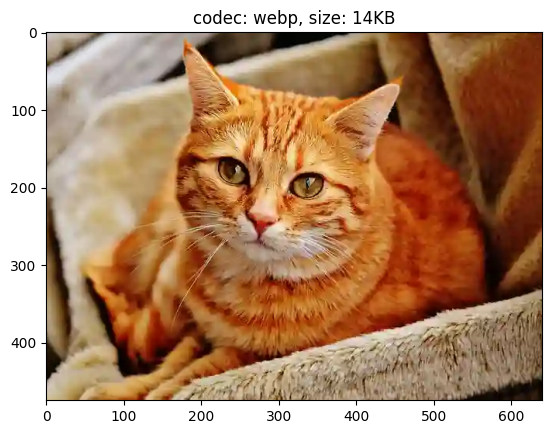

In [6]:
example_image = np.asarray(decoder.read(resources_dir + "cat-1046544_640.jp2").cpu())
plt.title(f"original image, size: {example_image.size // 1000}KB")
plt.imshow(example_image)
plt.show()

for codec in ["jpeg", "jpeg2k", "webp"]:
    encode_params = nvimgcodec.EncodeParams(quality_type=nvimgcodec.QualityType.QUALITY, quality_value=10)
    if codec == "jpeg2k":
        # jpeg2k must be encoded to YCC to be able to use quality
        encode_params.color_spec = nvimgcodec.ColorSpec.YCC

    encoded = encoder.encode(example_image, codec, encode_params)
    decoded = np.asarray(decoder.decode(encoded).cpu())
    plt.title(f"codec: {codec}, size: {len(encoded) // 1000}KB")
    plt.imshow(decoded)
    plt.show()